In [3]:
pip install pyodbc

In [4]:
pip install sodapy

In [5]:
import os
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import warnings
import sqlite3

In [6]:
try:
    df_resultados_Est_Colombianos_ext = pd.read_json('https://www.datos.gov.co/resource/y399-rzwf.json')
    print("El dataset se cargó exitosamente.")
except FileNotFoundError as e:
    print(f"Error: El archivo no se pudo encontrar. Detalles: {e}")
except Exception as e:
    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente.


In [8]:
from sodapy import Socrata

# Crea una instancia de la clase Socrata con dos argumentos:
    # 1: "www.datos.gov.co": Es la URL del portal de datos de Colombia (www.datos.gov.co) al que se quiere conectar.
    # 2: None: Este argumento es utilizado para especificar un token de acceso a la API si se requiere autenticación,
        # pero en este caso se pasa como None, lo que significa que no se está usando autenticación para acceder a los datos.
client = Socrata("www.datos.gov.co", None)

# Utiliza el método get del objeto client para hacer una solicitud a la API de Socrata.
results = client.get("y399-rzwf", limit=1565690)

# Convierte los resultados obtenidos de la API, que están en formato de lista de diccionarios, en un DataFrame de pandas.
results_df = pd.DataFrame.from_records(results)

In [9]:
results_df

,pa_s,c_digo_iso_pa_s,ciudad_de_residencia,oficina_de_registro,grupo_edad,edad_a_os,rea_conocimiento,sub_area_conocimiento,nivel_acad_mico,estado_civil,g_nero,etnia_de_la_persona,estatura_cm,ciudad_de_nacimiento,localizaci_n,fecha_de_registro,cantidad_de_personas
0,AFGANISTAN,AFG,BADAKHSHAN/BARREH BARREH,C. NUEVA DELHI,ADULTO JOVEN,23,NINGUNA,NINGUNA,NO INDICA,SOLTERO,MASCULINO,INDÍGENA,-1,COLOMBIA/SANTANDER/BARRANCABERMEJA,"{'latitude': '33.93911', 'longitude': '67.7099...",2021-02,1
1,AFGANISTAN,AFG,BADAKHSHAN/BUCHI,C. NUEVA DELHI,ADULTO,35,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ADMINISTRACIÓN,NO INDICA,DESCONOCIDO,FEMENINO,OTRO,-1,COLOMBIA/SANTANDER/BUCARAMANGA,"{'latitude': '33.93911', 'longitude': '67.7099...",2018-10,1
2,AFGANISTAN,AFG,KABOL/KABUL,C. NUEVA DELHI,ADULTO,34,NO INDICA,NO INDICA,NO INDICA,DESCONOCIDO,MASCULINO,SIN ETNIA REGISTRADA,-1,(NO REGISTRA),"{'latitude': '33.93911', 'longitude': '67.7099...",2014-09,1
3,AFGANISTAN,AFG,KABOL/KABUL,C. NUEVA DELHI,ADULTO,44,CIENCIAS SOCIALES Y HUMANAS,CIENCIA POLÍTICA Y/O RELACIONES INTERNACIONALES,PREGRADO - PROFESIONAL,SOLTERO,MASCULINO,NINGUNA,-1,COLOMBIA/CUNDINAMARCA/BOGOTA,"{'latitude': '33.93911', 'longitude': '67.7099...",2022-10,1
4,AFGANISTAN,AFG,KABOL/KABUL,C. NUEVA DELHI,ADULTO MAYOR,61,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ADMINISTRACIÓN,PREGRADO - PROFESIONAL,SOLTERO,FEMENINO,OTRO,162,COLOMBIA/VALLE DEL CAUCA/CALI,"{'latitude': '33.93911', 'longitude': '67.7099...",2015-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565685,VIETNAM,VNM,HA NOI/HANOI,C. HANOI,ADULTO JOVEN,22,NINGUNA,NINGUNA,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,-1,COLOMBIA/NORTE DE SANTANDER/OCAÑA,"{'latitude': '14.058324', 'longitude': '108.27...",2022-10,1
1565686,YEMEN,YEM,ADAN/ADEN,C. ABU DHABI,ADULTO,41,CIENCIAS SOCIALES Y HUMANAS,CIENCIA POLÍTICA Y/O RELACIONES INTERNACIONALES,POSTGRADO - ESPECIALIZACIÓN,CASADO,MASCULINO,NINGUNA,-1,COLOMBIA/NORTE DE SANTANDER/CUCUTA,"{'latitude': '15.552727', 'longitude': '48.516...",2022-11,1
1565687,YEMEN,YEM,SAN/SANAA,C. ABU DHABI,ADULTO,37,"ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES",ADMINISTRACIÓN,PREGRADO - PROFESIONAL,SOLTERO,MASCULINO,SIN ETNIA REGISTRADA,183,SOMALIA/BANAADIR/MOGADISHO,"{'latitude': '15.552727', 'longitude': '48.516...",2015-03,1
1565688,YEMEN,YEM,SAN/SANAA,C. ABU DHABI,ADULTO,39,NINGUNA,NINGUNA,NINGUNO,SOLTERO,FEMENINO,NINGUNA,165,SOMALIA/BANAADIR/MOGADISHO,"{'latitude': '15.552727', 'longitude': '48.516...",2015-03,1


In [10]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565690 entries, 0 to 1565689
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   pa_s                   1565690 non-null  object
 1   c_digo_iso_pa_s        1565690 non-null  object
 2   ciudad_de_residencia   1565690 non-null  object
 3   oficina_de_registro    1565690 non-null  object
 4   grupo_edad             1565690 non-null  object
 5   edad_a_os              1565690 non-null  object
 6   rea_conocimiento       1565690 non-null  object
 7   sub_area_conocimiento  1565690 non-null  object
 8   nivel_acad_mico        1565690 non-null  object
 9   estado_civil           1565690 non-null  object
 10  g_nero                 1565690 non-null  object
 11  etnia_de_la_persona    1565690 non-null  object
 12  estatura_cm            1565690 non-null  object
 13  ciudad_de_nacimiento   1565690 non-null  object
 14  localizaci_n           1565690 non

In [11]:
results_df.dtypes

,0
pa_s,object
c_digo_iso_pa_s,object
ciudad_de_residencia,object
oficina_de_registro,object
grupo_edad,object
edad_a_os,object
rea_conocimiento,object
sub_area_conocimiento,object
nivel_acad_mico,object
estado_civil,object


LIMPEZA DE DATOS

In [12]:
results_df['edad_a_os'].value_counts().sort_values(ascending=False)

,count
edad_a_os,
35,39989
33,39845
34,39084
32,38141
36,38036
...,...
135,1
140,1
112,1


In [13]:
pd.set_option('display.max_rows', None)
results_df['edad_a_os'].value_counts(dropna=False).sort_values(ascending=False)

,count
edad_a_os,
35,39989
33,39845
34,39084
32,38141
36,38036
37,37876
39,37801
38,37051
31,36947


In [14]:
#Reemplazar valores mayores o iguales a 60 en la columna 'edad_a_os' por 20
results_df['edad_a_os'] = pd.to_numeric(results_df['edad_a_os'], errors='coerce')

# Reemplazar valores mayores o iguales a 60 por 20
results_df.loc[results_df['edad_a_os'] >= 60, 'edad_a_os'] = 20

# Ver el conteo de los valores en la columna después del reemplazo
print(results_df['edad_a_os'].value_counts())

edad_a_os
 20    306296
 35     39989
 33     39845
 34     39084
 32     38141
 36     38036
 37     37876
 39     37801
 38     37051
 31     36947
 42     36495
 40     36401
 43     36392
 44     36202
 41     35988
 30     35456
 45     34909
 29     33546
 46     32479
 47     31592
 28     30233
 48     29957
 49     28295
 50     27247
 27     26242
 53     26160
 52     26064
 51     26053
 54     24734
 55     24508
 56     24379
 26     23456
 57     23282
 58     22898
 59     22696
 25     22148
 24     20207
 23     18013
 22     16778
 21     15503
 19     13057
 18      9836
 16      5846
 17      5817
 15      5452
 14      5340
 13      5264
 12      5092
 11      4780
 10      4152
 9       3877
 8       3456
-1       2991
 7       2656
 6       2071
 5       1669
 4       1575
 3       1280
 2       1110
 1        658
 0        332
Name: count, dtype: int64


In [15]:
#Reemplazar valores Menores o iguales a 12 en la columna 'edad_a_os' por 35
results_df['edad_a_os'] = pd.to_numeric(results_df['edad_a_os'], errors='coerce')

# Reemplazar valores mayores o iguales a 60 por 20
results_df.loc[results_df['edad_a_os'] <= 12, 'edad_a_os'] = 35

# Ver el conteo de los valores en la columna después del reemplazo
print(results_df['edad_a_os'].value_counts())

edad_a_os
20    306296
35     75688
33     39845
34     39084
32     38141
36     38036
37     37876
39     37801
38     37051
31     36947
42     36495
40     36401
43     36392
44     36202
41     35988
30     35456
45     34909
29     33546
46     32479
47     31592
28     30233
48     29957
49     28295
50     27247
27     26242
53     26160
52     26064
51     26053
54     24734
55     24508
56     24379
26     23456
57     23282
58     22898
59     22696
25     22148
24     20207
23     18013
22     16778
21     15503
19     13057
18      9836
16      5846
17      5817
15      5452
14      5340
13      5264
Name: count, dtype: int64


In [16]:
results_df['c_digo_iso_pa_s'].value_counts().sort_values(ascending=False)

,count
c_digo_iso_pa_s,
USA,454962
ESP,392532
VEN,218006
ECU,85148
CAN,50872
CHL,49699
ARG,32418
PAN,30684
BRA,24415


In [17]:
results_df.describe()

,edad_a_os
count,1.565690e+06
mean,3.519293e+01
std,1.225768e+01
min,1.300000e+01
25%,2.300000e+01
50%,3.500000e+01
75%,4.500000e+01
max,5.900000e+01


In [18]:
results_df.describe(include=['object'])

,pa_s,c_digo_iso_pa_s,ciudad_de_residencia,oficina_de_registro,grupo_edad,rea_conocimiento,sub_area_conocimiento,nivel_acad_mico,estado_civil,g_nero,etnia_de_la_persona,estatura_cm,ciudad_de_nacimiento,localizaci_n,fecha_de_registro,cantidad_de_personas
count,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690,1565690
unique,193,188,37378,127,7,14,65,12,8,4,8,211,11965,186,141,26
top,ESTADOS UNIDOS,USA,MADRID/MADRID,C. MADRID,ADULTO,NINGUNA,NINGUNA,NO INDICA,SOLTERO,FEMENINO,OTRO,-1,COLOMBIA/CUNDINAMARCA/BOGOTA,"{'latitude': '37.09024', 'longitude': '-95.712...",2018-03,1
freq,454962,454962,72103,153898,1000503,810685,810677,767800,787862,855827,800261,1251601,221927,454962,31476,1554825


In [19]:
results_df['grupo_edad'].value_counts()

,count
grupo_edad,
ADULTO,1000503
ADULTO MAYOR,291149
ADULTO JOVEN,210620
ADOLESCENTE,32811
INFANTE,20992
PRIMERA INFANCIA,6624
DESCONOCIDO,2991


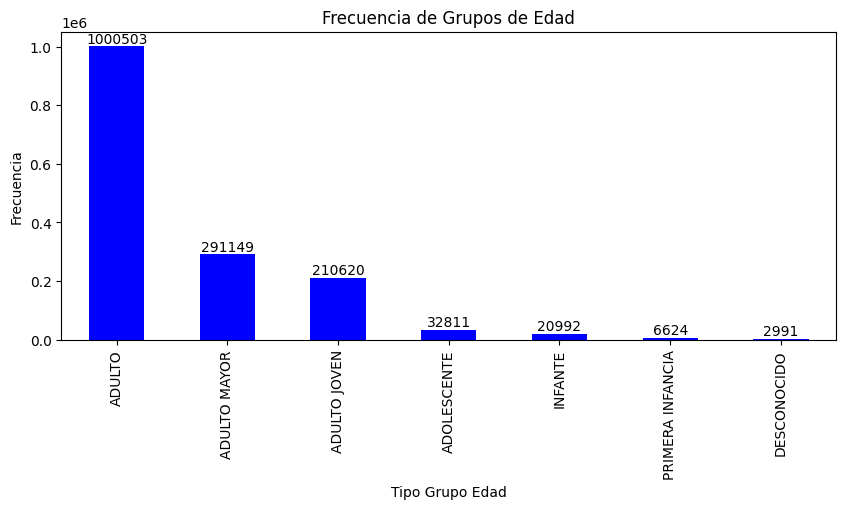

In [20]:
# Obtener valores únicos y su frecuencia en la columna 'grupo_edad'
tipo_grupo_edad_counts = results_df['grupo_edad'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 4))
ax = tipo_grupo_edad_counts.plot(kind='bar', color = 'blue')

# Añadir la cantidad en cada barra
for i, v in enumerate(tipo_grupo_edad_counts):
    ax.text(i, v + 1000, str(v), ha = 'center', va='bottom', fontsize=10)

# Títulos y etiquetas
plt.title('Frecuencia de Grupos de Edad')
plt.xlabel('Tipo Grupo Edad')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

In [21]:
results_df['g_nero'].value_counts()

,count
g_nero,
FEMENINO,855827
MASCULINO,707239
DESCONOCIDO,2617
NO_BINARIO,7


In [22]:
# reemplazar valores "-"
results_df['g_nero'] = results_df['g_nero'].replace('NO_BINARIO','DESCONOCIDO')

# contar registros de la columna 'ESTU_GENERO'
results_df['g_nero'].value_counts()

,count
g_nero,
FEMENINO,855827
MASCULINO,707239
DESCONOCIDO,2624


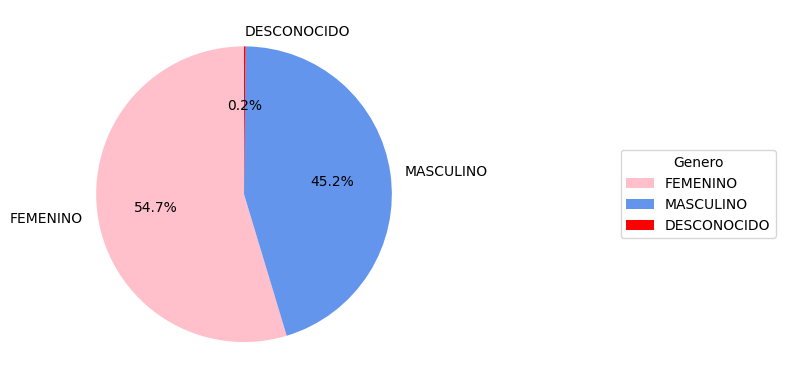

In [23]:
# Cantidad de registros por el tipo de genero

# generar conteo de registros por valor único en la columna ESTU_GENERO
df_genero = results_df['g_nero'].value_counts()

# establecer etiquetas y colores
etiquetas = ['FEMENINO','MASCULINO','DESCONOCIDO']
colores = ['#FFC0CB', '#6495ED', '#FF0000']

# crear gráfico de torta
plt.pie(df_genero, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)

# agregar leyenda
plt.legend(title='Genero', loc = 'center left', bbox_to_anchor=(1.5, 0.5))

# mostrar gráfico
plt.show()

In [24]:
results_df['fecha_de_registro'].value_counts().sort_values(ascending=False)

,count
fecha_de_registro,
2018-03,31476
2015-11,27117
2014-01,24847
2015-10,22901
2014-03,21113
2015-09,19656
2023-03,18575
2018-01,18572
2024-04,18424


In [ ]:
# Reemplazar el formato YYYY-MM por solo YYYY
results_df['año'] = results_df['fecha_de_registro'].str.replace(r'-\d{2}', '', regex=True)
print("\nDataFrame con solo el año:")
print(results_df)


DataFrame con solo el año:


In [ ]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565690 entries, 0 to 1565689
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   pa_s                   1565690 non-null  object
 1   c_digo_iso_pa_s        1565690 non-null  object
 2   ciudad_de_residencia   1565690 non-null  object
 3   oficina_de_registro    1565690 non-null  object
 4   grupo_edad             1565690 non-null  object
 5   edad_a_os              1565690 non-null  object
 6   rea_conocimiento       1565690 non-null  object
 7   sub_area_conocimiento  1565690 non-null  object
 8   nivel_acad_mico        1565690 non-null  object
 9   estado_civil           1565690 non-null  object
 10  g_nero                 1565690 non-null  object
 11  etnia_de_la_persona    1565690 non-null  object
 12  estatura_cm            1565690 non-null  object
 13  ciudad_de_nacimiento   1565690 non-null  object
 14  localizaci_n           1565690 non

In [1]:
results_df

NameError: name 'results_df' is not defined

In [1]:
results_df.to_csv('resultados_Est_Colombianos.csv', index=False)


NameError: name 'results_df' is not defined